In [1]:
!python --version
!pip --version

Python 3.12.7
pip 24.3.1 from C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)



In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset (important for MLP performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Multi-Layer Perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                    solver='adam', max_iter=200, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n")
# print( classification_report(y_test, y_pred) )
display( pd.DataFrame( classification_report(y_test, y_pred, output_dict=True) ).transpose() )



Accuracy: 96.00%

Classification Report:



,precision,recall,f1-score,support
0,0.980519,0.943750,0.961783,160.00
1,0.938356,0.978571,0.958042,140.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.959438,0.961161,0.959913,300.00
weighted avg,0.960843,0.960000,0.960037,300.00


# MLP [Raw Code]


First 10 rows of the generated xor_dataset.csv :


,Input_1,Input_2,Output
0,0.374540,0.950714,1
1,0.731994,0.598658,0
2,0.156019,0.155995,0
3,0.058084,0.866176,1
4,0.601115,0.708073,0
5,0.020584,0.969910,1
6,0.832443,0.212339,1
7,0.181825,0.183405,0
8,0.304242,0.524756,1
9,0.431945,0.291229,0


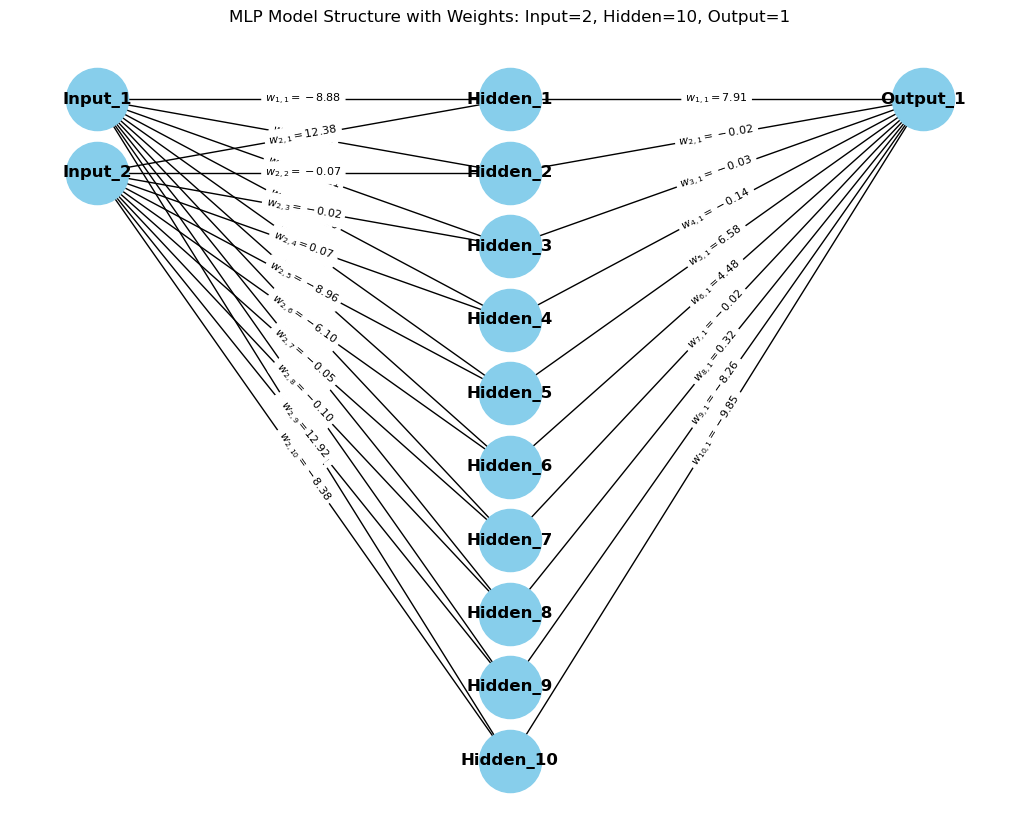

Accuracy: 99.03%

Classification Report:


,precision,recall,f1-score,support
0,0.981928,1.000000,0.990881,163.00000
1,1.000000,0.979310,0.989547,145.00000
accuracy,0.990260,0.990260,0.990260,0.99026
macro avg,0.990964,0.989655,0.990214,308.00000
weighted avg,0.990436,0.990260,0.990253,308.00000


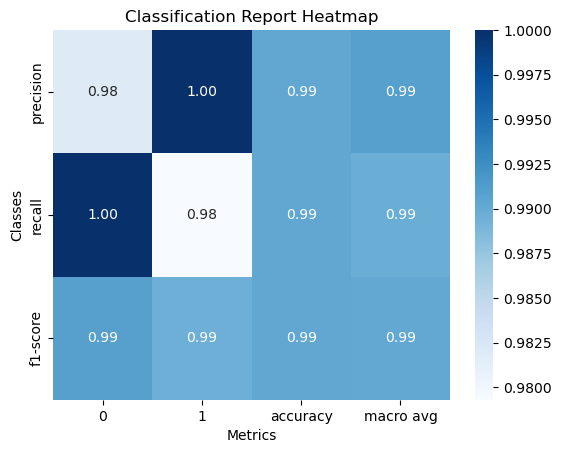


Confusion Matrix:
[[163   0]
 [  3 142]]


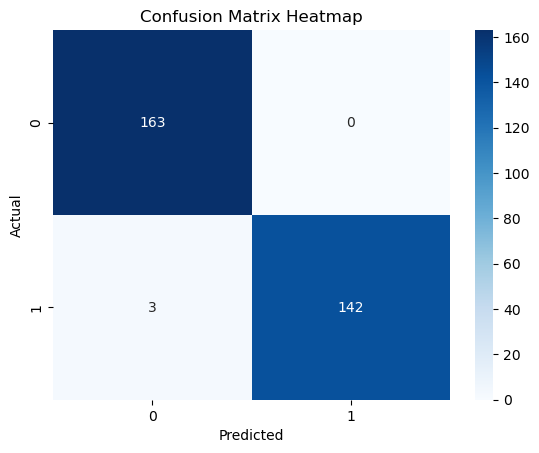

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Improved MLP class with ReLU and Adam optimizer
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_output = np.zeros(output_size)

    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output

    def backward(self, X, y):
        output_error = y - self.output
        output_gradient = output_error * self.sigmoid_derivative(self.output)
        
        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
        hidden_gradient = hidden_error * self.relu_derivative(self.hidden_output)
        
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0) * self.learning_rate
        
        self.weights_input_hidden += np.dot(X.T, hidden_gradient) * self.learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X) > 0.5
    
    def plot_structure(self):
        """Visualizes the structure of the MLP with input, hidden, and output layers, including weights."""
        import networkx as nx
        import matplotlib.pyplot as plt

        # Create a directed graph
        G = nx.DiGraph()

        # Nodes for input layer, hidden layer, and output layer
        input_nodes = [f"Input_{i+1}" for i in range(self.input_size)]
        hidden_nodes = [f"Hidden_{i+1}" for i in range(self.hidden_size)]
        output_nodes = [f"Output_{i+1}" for i in range(self.output_size)]

        # Add nodes to the graph
        G.add_nodes_from(input_nodes, layer='input')
        G.add_nodes_from(hidden_nodes, layer='hidden')
        G.add_nodes_from(output_nodes, layer='output')

        # Add edges between layers (fully connected layers) with weights
        edge_labels = {}
        for i, input_node in enumerate(input_nodes):
            for j, hidden_node in enumerate(hidden_nodes):
                weight = self.weights_input_hidden[i, j]
                G.add_edge(input_node, hidden_node)
                edge_labels[(input_node, hidden_node)] = f"$w_{{{i+1},{j+1}}}={weight:.2f}$"

        for j, hidden_node in enumerate(hidden_nodes):
            for k, output_node in enumerate(output_nodes):
                weight = self.weights_hidden_output[j, k]
                G.add_edge(hidden_node, output_node)
                edge_labels[(hidden_node, output_node)] = f"$w_{{{j+1},{k+1}}}={weight:.2f}$"

        # Define positions for plotting
        pos = {}
        layer_spacing = 2  # Distance between layers
        node_spacing = 1.5  # Distance between nodes in the same layer

        # Position input layer nodes
        for i, node in enumerate(input_nodes):
            pos[node] = (0, -i * node_spacing)

        # Position hidden layer nodes
        for i, node in enumerate(hidden_nodes):
            pos[node] = (layer_spacing, -i * node_spacing)

        # Position output layer nodes
        for i, node in enumerate(output_nodes):
            pos[node] = (2 * layer_spacing, -i * node_spacing)

        # Draw the graph
        plt.figure(figsize=(10, 8))
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', arrows=False)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

        # Title
        plt.title(f"MLP Model Structure with Weights: Input={self.input_size}, Hidden={self.hidden_size}, Output={self.output_size}")
        plt.axis('off')  # Hide axis
        plt.show()

# Generate XOR dataset with 2 inputs and 1024 rows
np.random.seed(42)
X = np.random.rand(1024, 2)
y = np.logical_xor.reduce((X >= 0.5).astype(int), axis=1).astype(int)

# X = np.random.randint(0, 2, size=(1024, 4))  # Generate random integers (0 or 1)
# y = np.logical_xor.reduce(X, axis=1).astype(int)  # Compute XOR based on integers

# Save dataset to CSV
xor_dataset = pd.DataFrame(X, columns=[f"Input_{i+1}" for i in range(X.shape[1])])
xor_dataset['Output'] = y
csv_filename = "xor_dataset.csv"
xor_dataset.to_csv(csv_filename, index=False)

# Load dataset from CSV
xor_dataset_loaded = pd.read_csv(csv_filename)

# Display the first 10 rows of the loaded dataset
print("\nFirst 10 rows of the generated xor_dataset.csv :")
display(xor_dataset_loaded.head(10))

# Split data into training and testing sets
X = xor_dataset_loaded.iloc[:, :-1].values
y = xor_dataset_loaded.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the MLP
mlp = MLP(input_size=X.shape[1], hidden_size=10, output_size=1, learning_rate=0.01)

# Train the MLP
mlp.train(X_train, y_train.reshape(-1, 1), epochs=10000)
mlp.plot_structure()
# Test the MLP
y_pred = mlp.predict(X_test).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model
print("\nClassification Report:")
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())
# Plot the classification report as a heatmap
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :-1],
            annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


### Class-Specific Metrics (0 and 1 Rows)
These rows represent performance metrics for each class (`0` and `1` in this case).

#### 1. Precision
- **Definition**: The ratio of correctly predicted positive observations to total predicted positive observations.
- **Formula**:  
  Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))
- **Interpretation**: Precision answers, "Of all the items classified as a specific class, how many are actually of that class?"

#### 2. Recall (Sensitivity or True Positive Rate)
- **Definition**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **Formula**:  
  Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))
- **Interpretation**: Recall answers, "Of all the items that truly belong to a specific class, how many did the model correctly identify?"

#### 3. F1-Score
- **Definition**: The harmonic mean of precision and recall.
- **Formula**:  
  F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- **Interpretation**: F1-score is a balanced metric that considers both precision and recall. It’s useful when you need a single metric to evaluate a model, especially when the classes are imbalanced.

#### 4. Support
- **Definition**: The number of actual occurrences of the class in the dataset.
- **Interpretation**: Support helps contextualize the metrics by showing how many samples belong to each class.
